# Glass_Identification

## Project Description

The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!

The chemical compositions are measured as the weight percent in corresponding oxide.
Attribute Information-

1   Id number: 1 to 214

2	RI: refractive index

3	Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

4	Mg: Magnesium

5	Al: Aluminum

6	Si: Silicon

7	K: Potassium

8	Ca: Calcium

9	Ba: Barium

10	Fe: Iron

11	Type of glass: (class attribute)

    1. building_windows_float_processed
    
    2. building_windows_non_float_processed
    
    3. vehicle_windows_float_processed
    
    4. vehicle_windows_non_float_processed (none in this database)
    
    5. containers
    
    6. tableware
    
    7. headlamps

##### There are 214 observations in the dataset. The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7). 

#### Predict : Type of glass


In [112]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [113]:
gi = pd.read_csv('Glass Identification.csv', header = None)  # as we have no header in given dataset I have set header  = none 
gi                                                           # so we can add header in next step 

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [114]:
# in our given dataset there is no header row so we will first creat/insert header row

In [115]:
gi.columns = ['Id number', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'TypeofGlass']
gi

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,TypeofGlass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [116]:
# so now we have added given attribut to column header.

In [117]:
gi.shape

(214, 11)

In [118]:
gi.dtypes

Id number        int64
RI             float64
Na             float64
Mg             float64
Al             float64
Si             float64
K              float64
Ca             float64
Ba             float64
Fe             float64
TypeofGlass      int64
dtype: object

In [119]:
# so we have 2 columns with int64 and rest with float64 datatype

In [120]:
gi.isnull().sum()

Id number      0
RI             0
Na             0
Mg             0
Al             0
Si             0
K              0
Ca             0
Ba             0
Fe             0
TypeofGlass    0
dtype: int64

In [121]:
# there is no null value in dataset


In [122]:
gi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id number    214 non-null    int64  
 1   RI           214 non-null    float64
 2   Na           214 non-null    float64
 3   Mg           214 non-null    float64
 4   Al           214 non-null    float64
 5   Si           214 non-null    float64
 6   K            214 non-null    float64
 7   Ca           214 non-null    float64
 8   Ba           214 non-null    float64
 9   Fe           214 non-null    float64
 10  TypeofGlass  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


<Axes: >

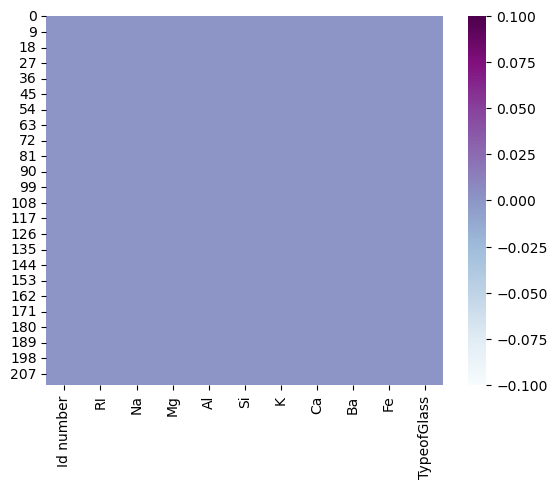

In [123]:
sns.heatmap(gi.isnull(),cmap = 'BuPu')

In [124]:
# so we can now confirm that there is no null values

In [125]:
# we will check for unique values
gi.nunique().to_frame('Unique Values')

,Unique Values
Id number,214
RI,178
Na,142
Mg,94
Al,118
Si,133
K,65
Ca,143
Ba,34
Fe,32


In [126]:
gi.describe()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,TypeofGlass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


So in given dataset 'Na', 'Al', 'Ca', 'Ba', and 'Fe' has higher mean then median

there are 0 value in Ba and Fe columns that need to check

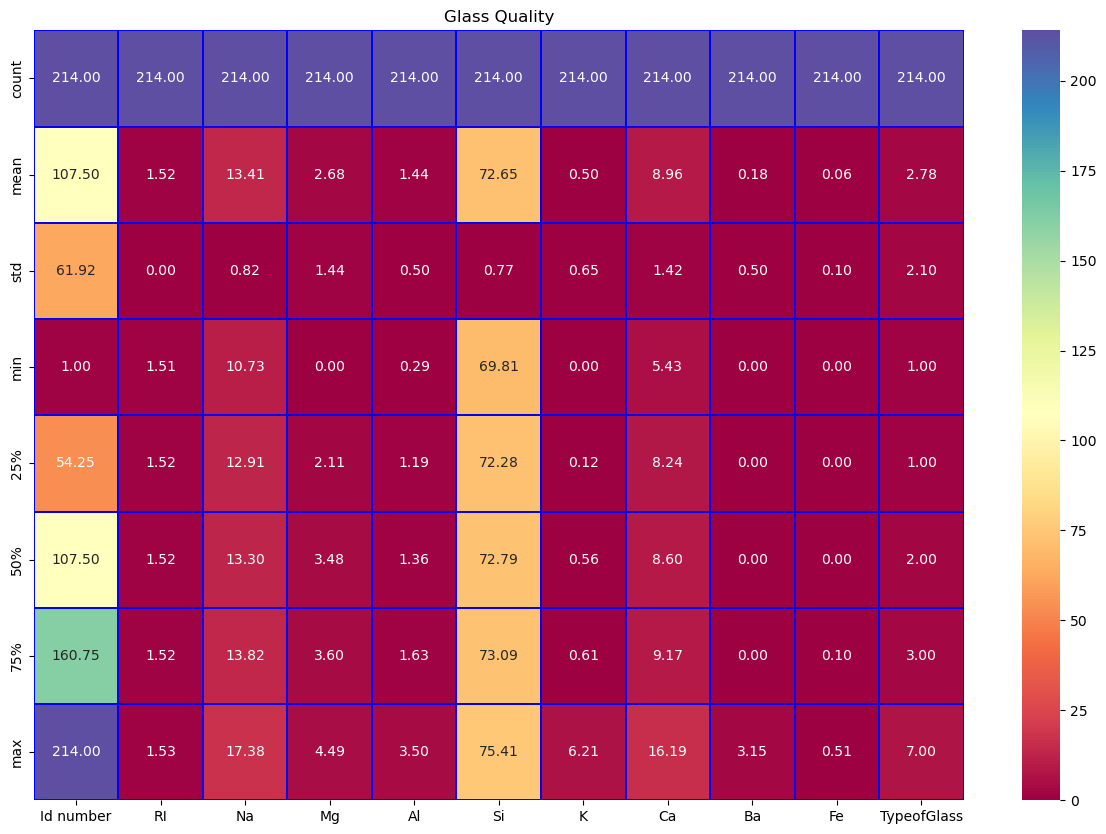

In [127]:
plt.figure(figsize = (15,10))
sns.heatmap(gi.describe(), annot = True, fmt ='0.2f', linewidth = 0.3, linecolor = 'blue', cmap = 'Spectral')
gi.xlable= ('Values')
plt.ylable = ('Column_Name')
plt.title('Glass Quality')
plt.show()

In [128]:
# Now we will check unique values in our target column 'Type of Glass'

In [129]:
gi['TypeofGlass'].unique()
gi['TypeofGlass'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: TypeofGlass, dtype: int64

In [130]:
# we will check blank values in our target column

In [131]:
gi.loc[gi['TypeofGlass'] == ' ']

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,TypeofGlass


In [132]:
# so there is no blank values in target column

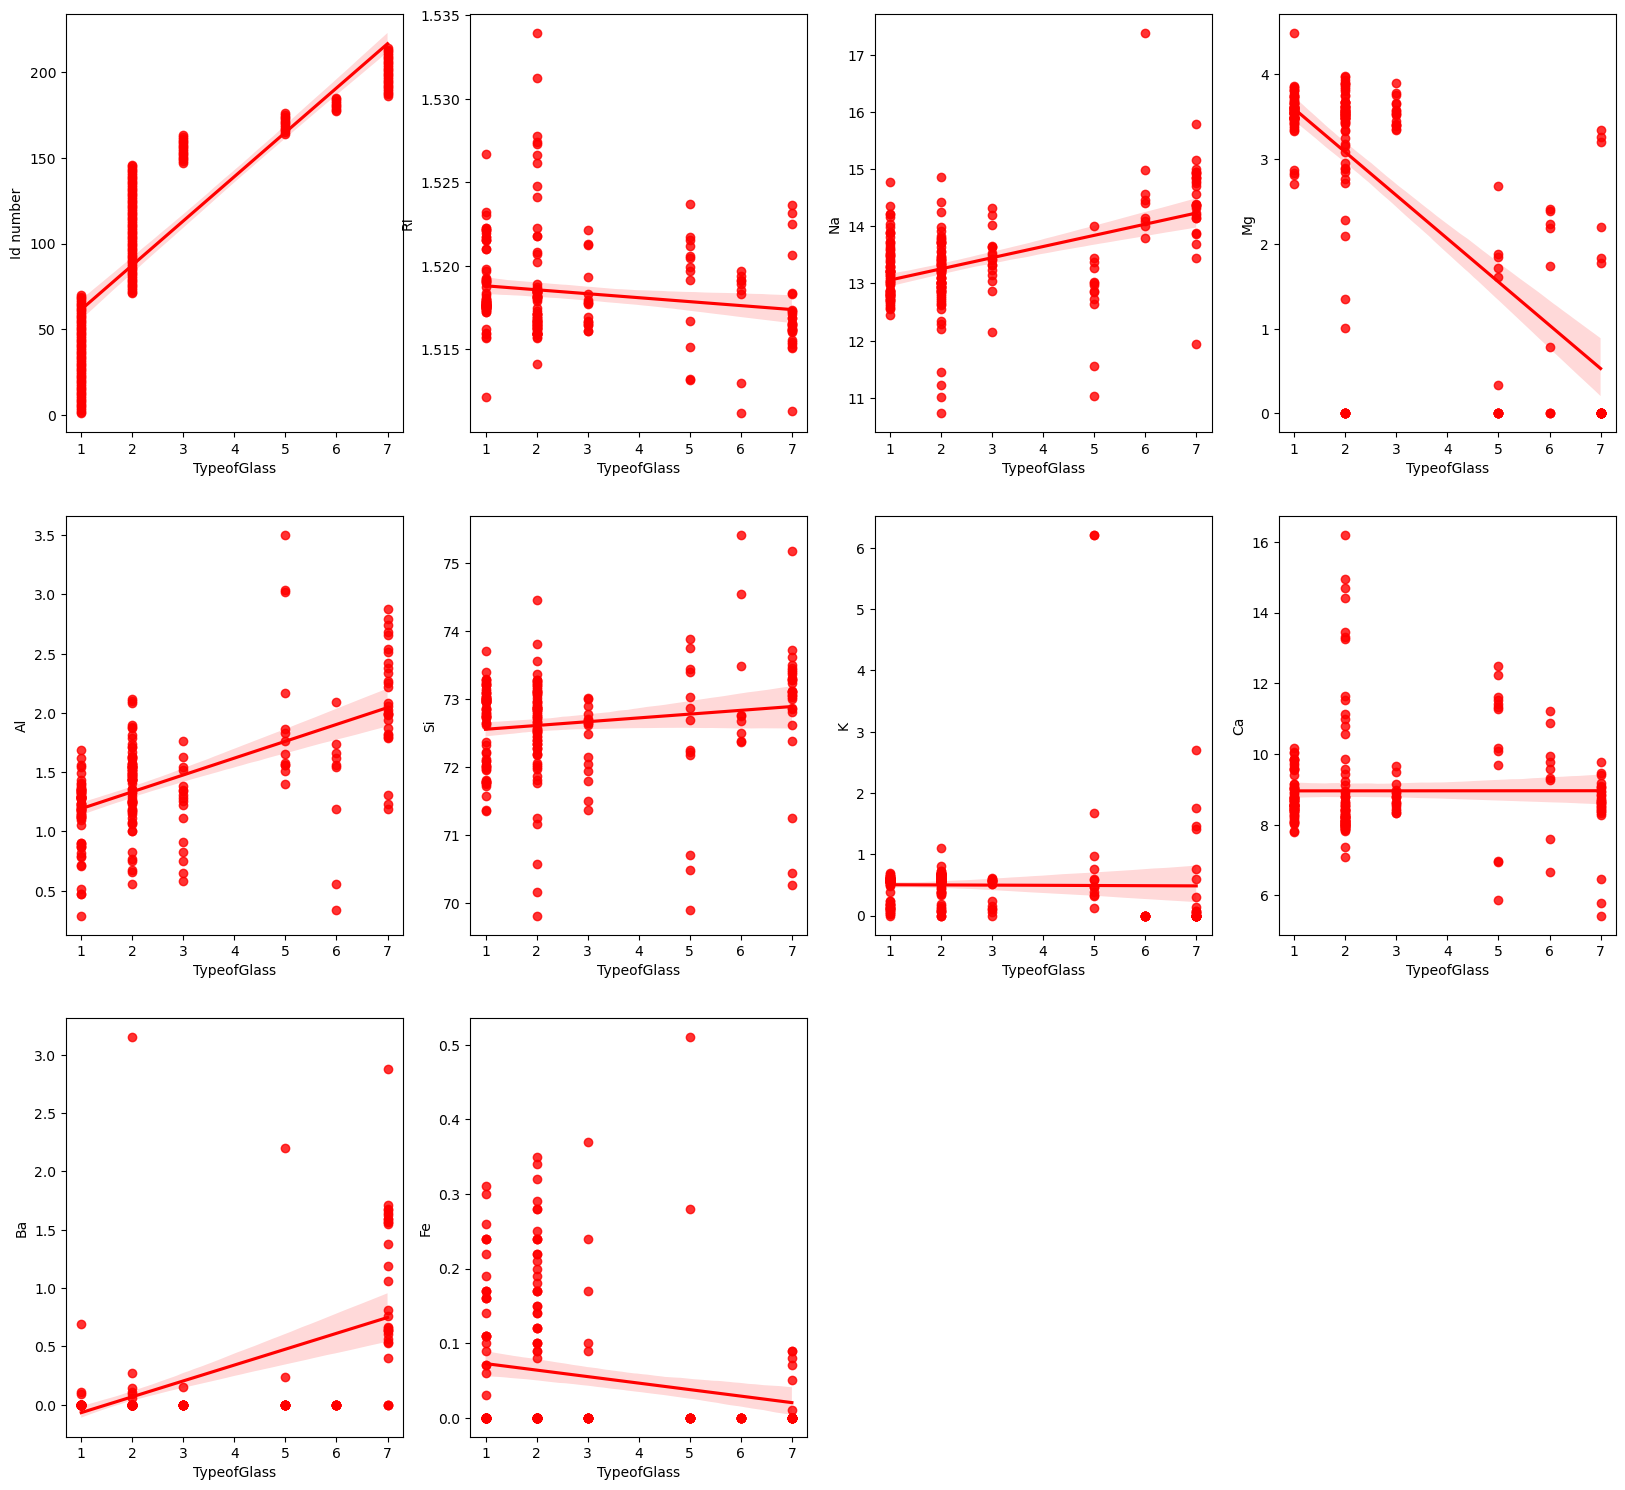

In [133]:
plt.figure(figsize=(20,25))
p=1
for i in gi:
    if p<=10:
        plt.subplot(4,4,p)
        sns.regplot(x = 'TypeofGlass', y=i, data=gi, color='r')
    p+=1

 So from above graph we can see that 'Si', 'K', and 'Ca' has none or very minor effect on Type of Glass

In [134]:
gi.drop(['Si','K','Ca'], axis=1, inplace = True)
gi.head()

,Id number,RI,Na,Mg,Al,Ba,Fe,TypeofGlass
0,1,1.52101,13.64,4.49,1.10,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,0.0,0.0,1


 Now we will use pairplot method to find out relationship between 'Type of Glass' and rest of the columns in our dataset

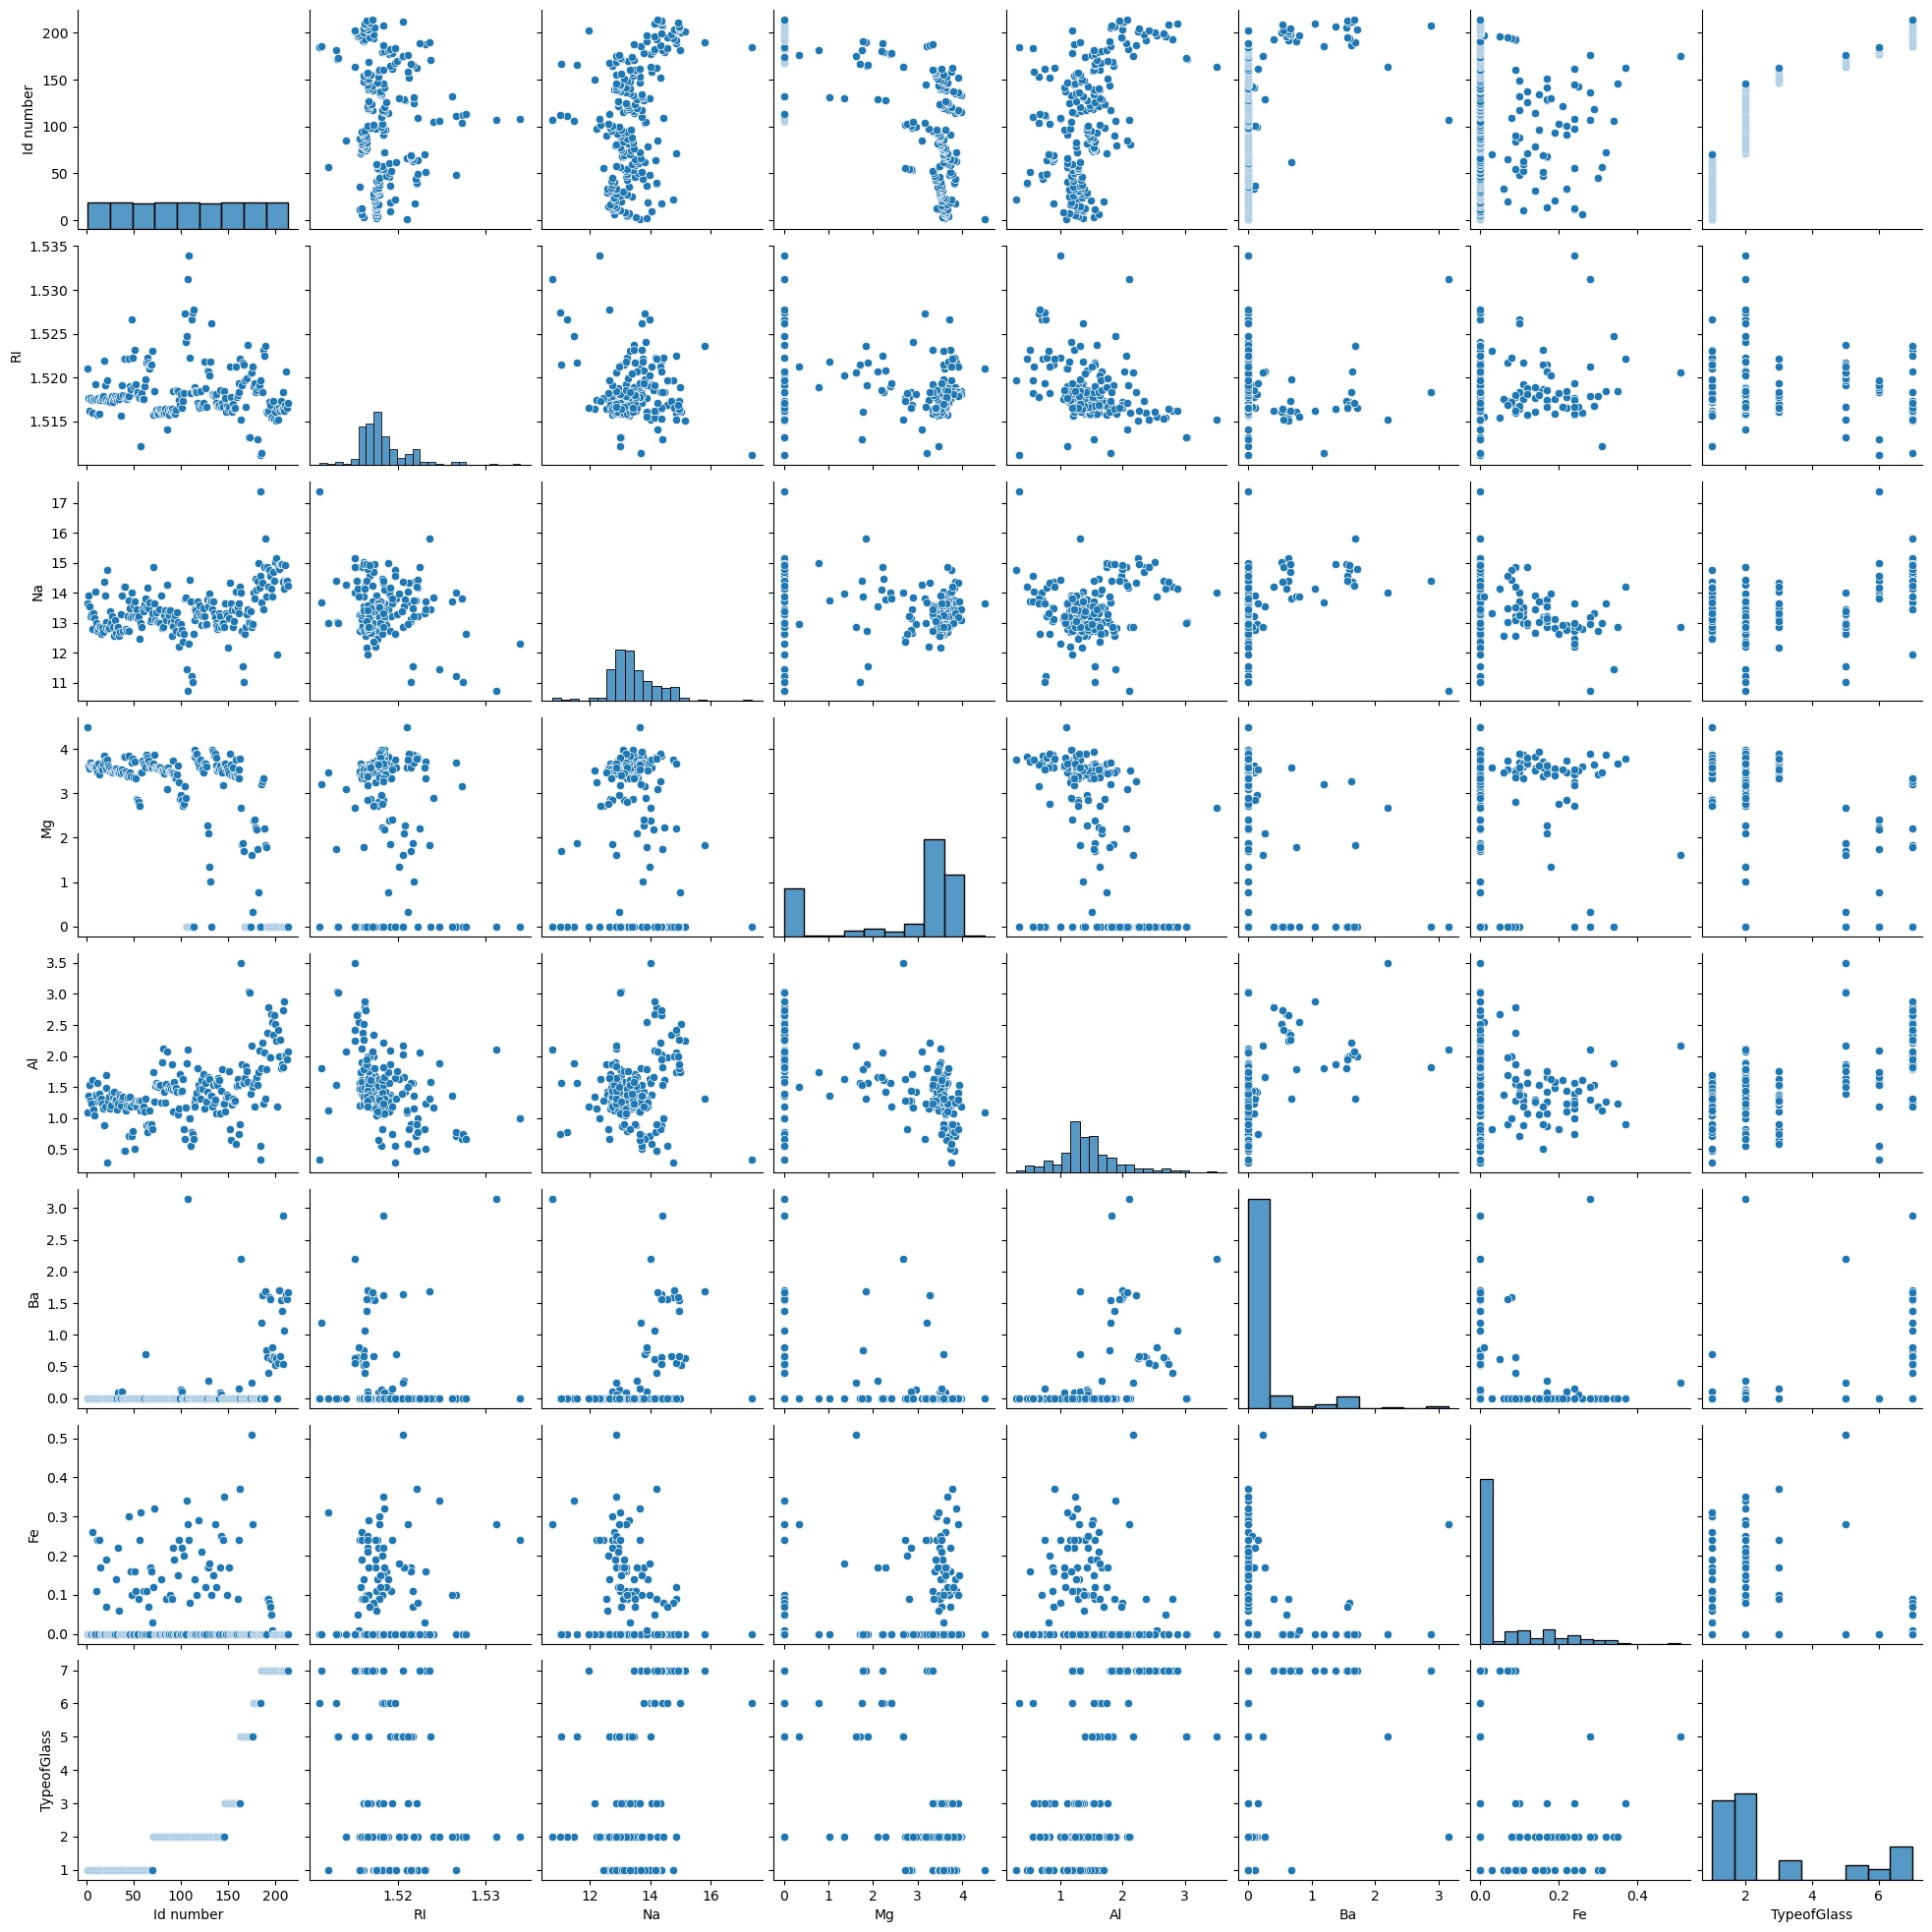

In [135]:
sns.pairplot(data=gi, palette = 'Dark')

we can use lineplot to inspect data if needed

Text(0.5, 1.0, 'Glass Identification')

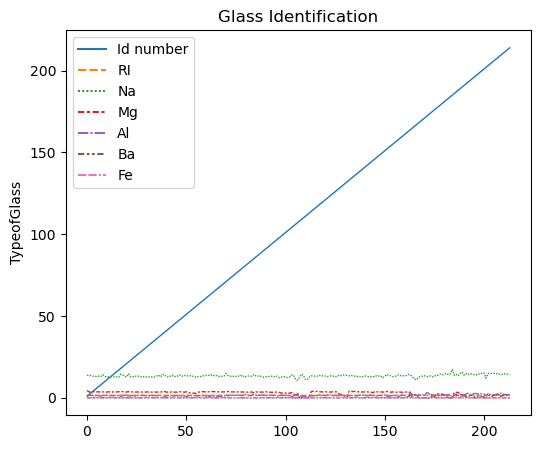

In [136]:
plt.figure(figsize= (6,5))
sns.lineplot(data=gi.iloc[:,:-1], linewidth=1)
plt.ylabel('TypeofGlass')
plt.title('Glass Identification')                          

Use of boxplot to find out outliners in our data

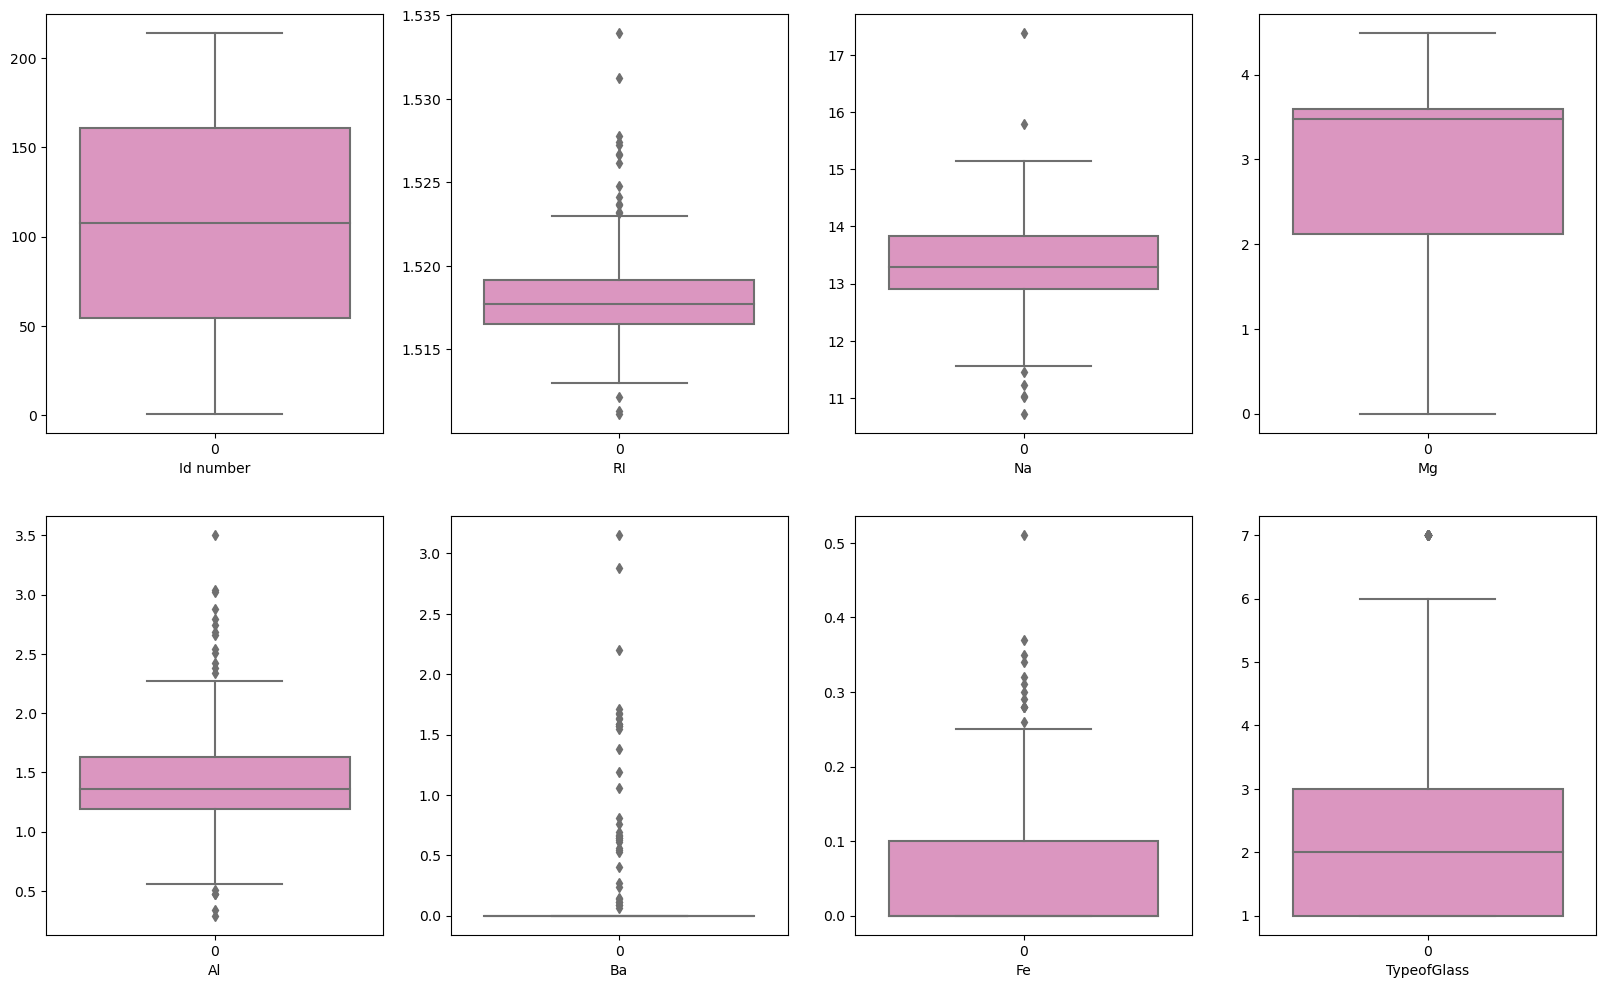

In [137]:
plt.figure(figsize=(20,25))
p=1
for i in gi:
    if p<=8:
        plt.subplot(4,4,p)
        sns.boxplot(gi[i], palette = 'Set2_r')
        plt.xlabel(i)
    p+=1
plt.show()

 we can see that we have outliners in 'Ri', 'Na', 'Ai', 'Ba' and 'Fe' columns.
 
 so we have to 1st remove outliners and clean our data.
 
 we will use z_socre and IQRmethod to remove outliers and best results we will take it.

In [138]:
from scipy.stats import zscore


In [139]:
gi1= gi.copy()
z_score=zscore(gi1)
z_score_abs = np.abs(z_score)
gi_new = gi1[(z_score_abs<3).all(axis=1)]
gi_new.shape

(200, 8)

In [140]:
gi_new['TypeofGlass'].value_counts()

2    72
1    70
7    25
3    16
5     9
6     8
Name: TypeofGlass, dtype: int64

Now let's check how many rows has been lost

In [141]:
print('Rows in Original Dataset', gi.shape[0])
print('Rows in New Dataset'  , gi_new.shape[0])
print('No of rows lost', gi.shape[0]-gi_new.shape[0])


Rows in Original Dataset 214
Rows in New Dataset 200
No of rows lost 14


 so after zscore method we have 200 rows where in our original dataset we had 214 rows  so we have lost 14 rows

In [142]:
# Now tiem to check how mane % of data we have lost
print(' With Z_score method we lost', 14/214*100,'% data')

 With Z_score method we lost 6.5420560747663545 % data


In [143]:
#Now we will try IQR method

In [144]:
gi2 = gi.copy()
q1 = gi2.quantile(0.25)
q3 = gi2.quantile(0.75)
IQR = q3-q1
print(IQR)

Id number      106.500000
RI               0.002635
Na               0.917500
Mg               1.485000
Al               0.440000
Ba               0.000000
Fe               0.100000
TypeofGlass      2.000000
dtype: float64


In [145]:
gi_new2 = gi2[~((gi<(q1-1.5*IQR))|(gi>(q3+1.5*IQR))).any(axis=1)]
gi_new2.shape

(146, 8)

In [146]:
print('Rows in Original Dataset', gi.shape[0])
print('Rows in New Dataset'  , gi_new2.shape[0])
print('No of rows lost', gi.shape[0]-gi_new2.shape[0])

Rows in Original Dataset 214
Rows in New Dataset 146
No of rows lost 68


In [147]:
print('IQR method we have lost', 68/214*100,'% of data')

IQR method we have lost 31.775700934579437 % of data


 So we can see that we have lost huge data with IQR method and given our dataset is very small it's not at all advisable to use IQR method. So we will continue with Z_score method.

In [148]:
gi=gi_new
gi

,Id number,RI,Na,Mg,Al,Ba,Fe,TypeofGlass
0,1,1.52101,13.64,4.49,1.10,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,0.00,0.0,1
...,...,...,...,...,...,...,...,...
208,209,1.51640,14.37,0.00,2.74,0.54,0.0,7
209,210,1.51623,14.14,0.00,2.88,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,1.64,0.0,7


 As per project statment The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7).
 
 We will now divide our dataset on base of glass classes

In [149]:
gi['class'] = [1 if x <5 else 0 for x in gi.TypeofGlass]

gi

,Id number,RI,Na,Mg,Al,Ba,Fe,TypeofGlass,class
0,1,1.52101,13.64,4.49,1.10,0.00,0.0,1,1
1,2,1.51761,13.89,3.60,1.36,0.00,0.0,1,1
2,3,1.51618,13.53,3.55,1.54,0.00,0.0,1,1
3,4,1.51766,13.21,3.69,1.29,0.00,0.0,1,1
4,5,1.51742,13.27,3.62,1.24,0.00,0.0,1,1
...,...,...,...,...,...,...,...,...,...
208,209,1.51640,14.37,0.00,2.74,0.54,0.0,7,0
209,210,1.51623,14.14,0.00,2.88,1.06,0.0,7,0
210,211,1.51685,14.92,0.00,1.99,1.59,0.0,7,0
211,212,1.52065,14.36,0.00,2.02,1.64,0.0,7,0


In [150]:
gi['class'].value_counts()

1    158
0     42
Name: class, dtype: int64

 we will drop TypeofGlass and id number columns


In [151]:
gi.drop(['TypeofGlass', 'Id number'], axis =1, inplace = True)
gi

,RI,Na,Mg,Al,Ba,Fe,class
0,1.52101,13.64,4.49,1.10,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,0.00,0.0,1
...,...,...,...,...,...,...,...
208,1.51640,14.37,0.00,2.74,0.54,0.0,0
209,1.51623,14.14,0.00,2.88,1.06,0.0,0
210,1.51685,14.92,0.00,1.99,1.59,0.0,0
211,1.52065,14.36,0.00,2.02,1.64,0.0,0


In [153]:
mean = pd.pivot_table(data =gi, index ='class', aggfunc = {'RI':np.mean, 'Na':np.mean,'Mg':np.mean,'Al':np.mean,'Ba':np.mean,'Fe':np.mean})

In [154]:
mean

,Al,Ba,Fe,Mg,Na,RI
class,,,,,,
0,1.929286,0.529048,0.015952,0.745238,13.998333,1.517872
1,1.284747,0.010823,0.061899,3.352025,13.222595,1.518337


In [155]:
gi.skew() # checking for skewness in dataset

RI       1.171675
Na      -0.003951
Mg      -1.374378
Al       0.633394
Ba       3.249892
Fe       1.524911
class   -1.434766
dtype: float64


So we can see that apart from 'Na' all other columns have skew higher then threshold of +/-0.5

we will check for data distributions to get clear idea of skewness in our dataset

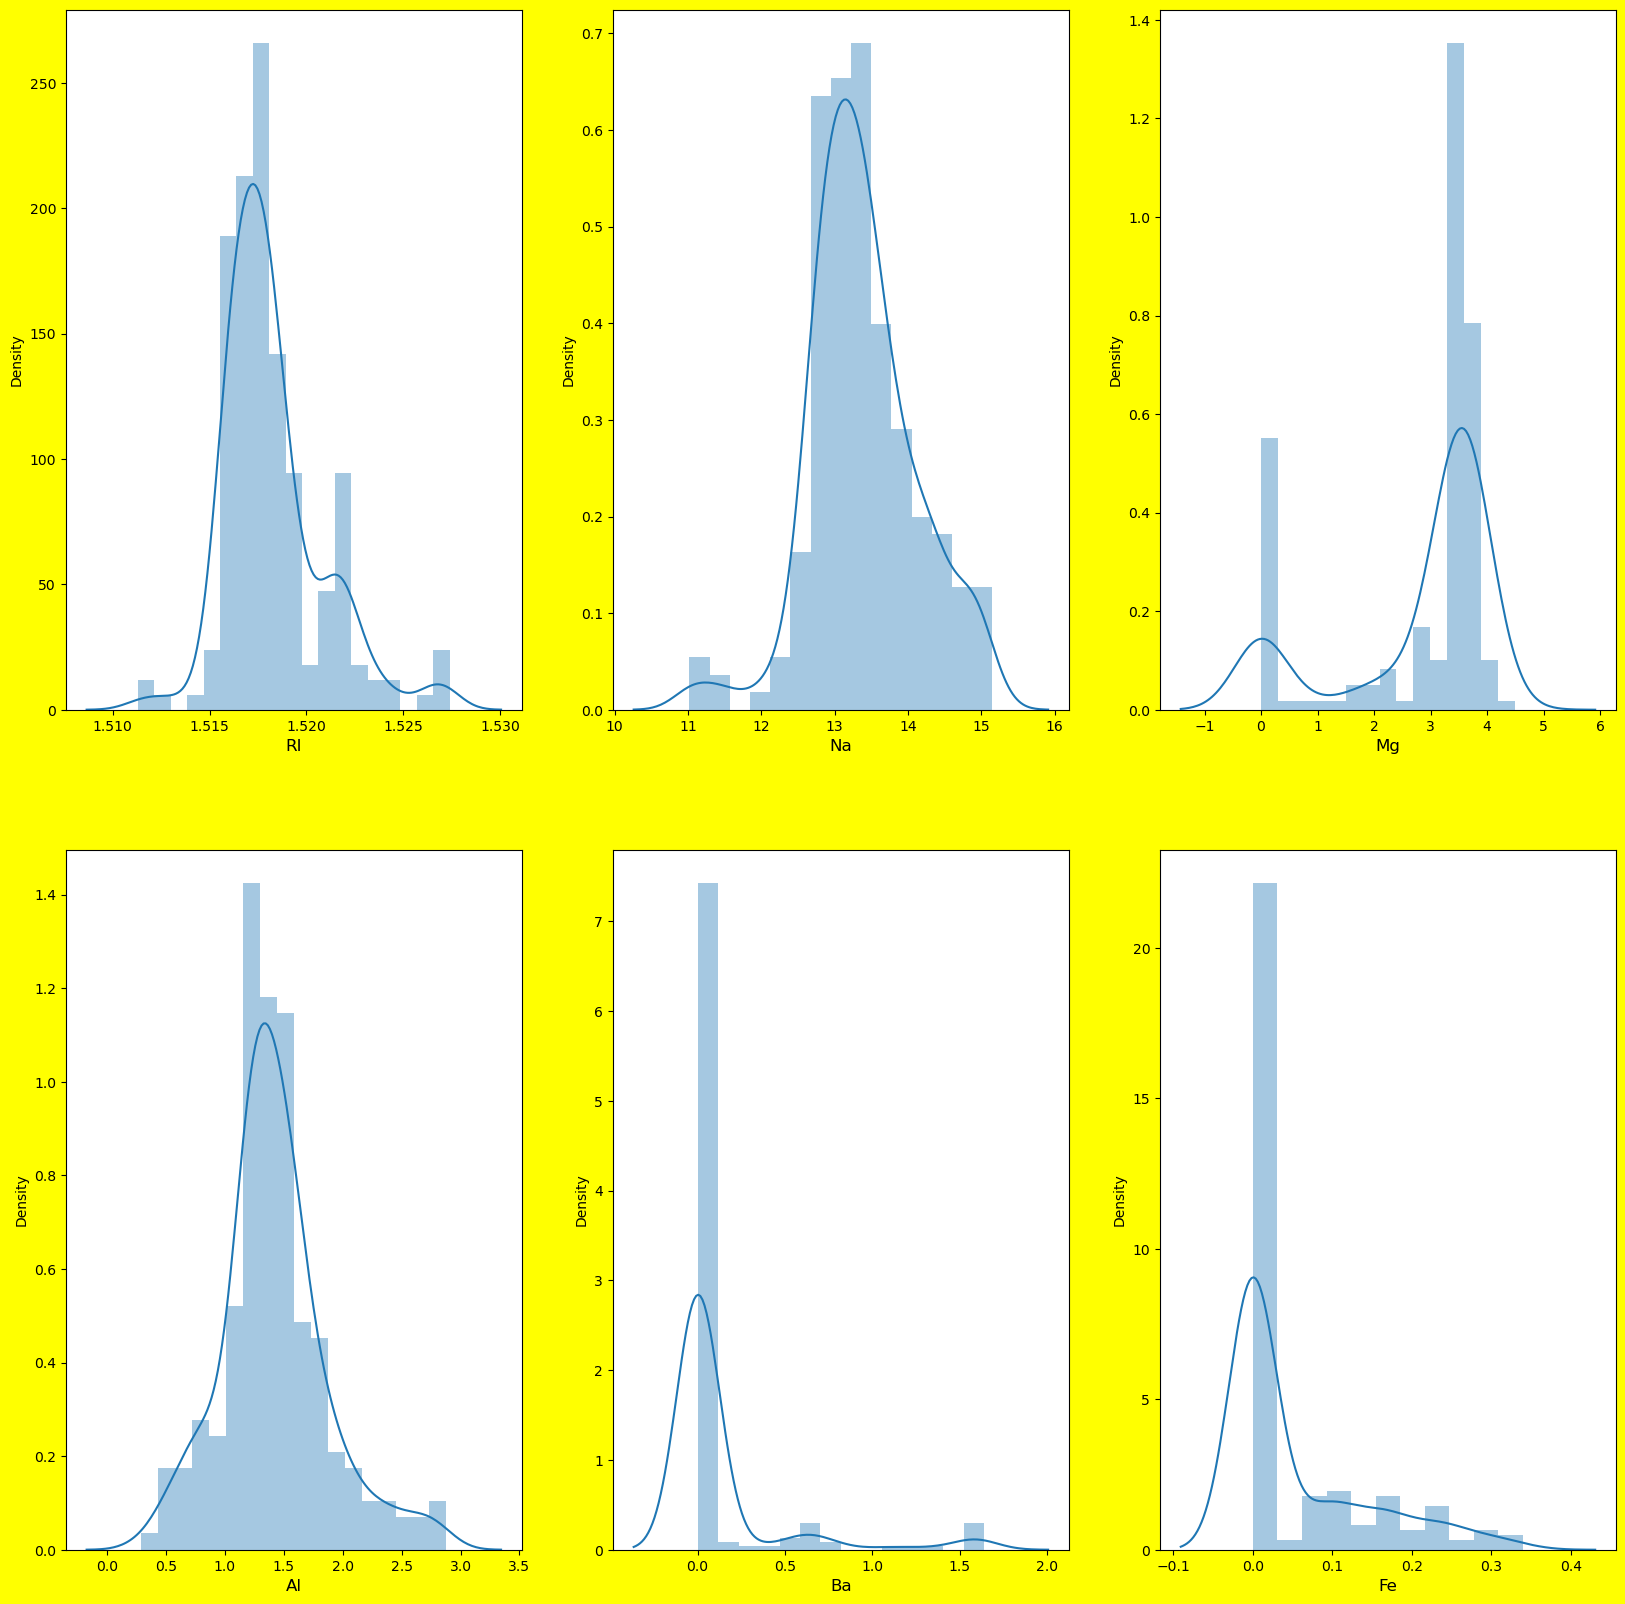

In [157]:
plt.figure(figsize = (20,20), facecolor = 'yellow')
p =1
for x in gi:
    if p<=6:
        x1= plt.subplot(2,3,p)
        sns.distplot(gi[x])
        plt.xlabel(x,fontsize=12)
    p+=1
plt.show()

In [158]:
gi.corr()

,RI,Na,Mg,Al,Ba,Fe,class
RI,1.000000,-0.073280,-0.089601,-0.478661,-0.193859,0.010485,0.074294
Na,-0.073280,1.000000,-0.313110,0.277409,0.497159,-0.209083,-0.434001
Mg,-0.089601,-0.313110,1.000000,-0.525081,-0.533591,0.102217,0.779200
Al,-0.478661,0.277409,-0.525081,1.000000,0.522610,-0.088901,-0.590273
Ba,-0.193859,0.497159,-0.533591,0.522610,1.000000,-0.118433,-0.600589
Fe,0.010485,-0.209083,0.102217,-0.088901,-0.118433,1.000000,0.214931
class,0.074294,-0.434001,0.779200,-0.590273,-0.600589,0.214931,1.000000


In [159]:
x= gi.drop(columns = ['class'])
y= gi['class']

In [160]:
from sklearn.preprocessing import power_transform

In [161]:
x= power_transform(x,method ='yeo-johnson')
x

array([[ 5.55111512e-17,  3.47450514e-01,  2.10973337e+00,
        -6.94678854e-01, -4.22241997e-01, -6.78112542e-01],
       [-1.38777878e-17,  6.91771406e-01,  6.19125723e-01,
        -6.62667055e-02, -4.22241997e-01, -6.78112542e-01],
       [-4.16333634e-17,  1.96130765e-01,  5.47739191e-01,
         3.37775814e-01, -4.22241997e-01, -6.78112542e-01],
       ...,
       [-3.12250226e-17,  2.11624887e+00, -1.86413718e+00,
         1.25796637e+00,  2.53548220e+00, -6.78112542e-01],
       [ 4.85722573e-17,  1.34061941e+00, -1.86413718e+00,
         1.31536351e+00,  2.53549396e+00, -6.78112542e-01],
       [-3.81639165e-17,  1.36827347e+00, -1.86413718e+00,
         1.16129707e+00,  2.53547666e+00, -6.78112542e-01]])

In [162]:
# checking skewness
pd.DataFrame(x).skew().sort_values()

2   -0.983580
0    0.000000
3    0.012629
1    0.018278
5    0.858312
4    2.015776
dtype: float64

In [163]:
# Now with over sampling using SMOTE
from imblearn.over_sampling import SMOTE

In [164]:
smt = SMOTE()
x_sample, y_sample = smt.fit_resample(x,y)

In [165]:
# Now we will use diffrent alogorithms

# Logistic Regression

In [169]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
from sklearn.svm import SVC
s = SVC()
from sklearn.metrics import accuracy_score, classification_report

In [173]:
for i in range(0,200):
    x_train,x_test, y_train,y_test = train_test_split(x,y,random_state = i, test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    if round (accuracy_score(y_train,pred_train)*100,1) == round(accuracy_score(y_test,pred_test)*100,1):
        print('At Random state ',i, 'Model Training Accuracy is :', accuracy_score(y_train,pred_train)*100)
        print('At Random state ',i, 'Model Test Accuracy is     :', accuracy_score(y_test, pred_test)*100,'\n')

At Random state  12 Model Training Accuracy is : 97.5
At Random state  12 Model Test Accuracy is     : 97.5 

At Random state  21 Model Training Accuracy is : 97.5
At Random state  21 Model Test Accuracy is     : 97.5 

At Random state  95 Model Training Accuracy is : 97.5
At Random state  95 Model Test Accuracy is     : 97.5 

At Random state  110 Model Training Accuracy is : 97.5
At Random state  110 Model Test Accuracy is     : 97.5 

At Random state  119 Model Training Accuracy is : 97.5
At Random state  119 Model Test Accuracy is     : 97.5 

At Random state  141 Model Training Accuracy is : 97.5
At Random state  141 Model Test Accuracy is     : 97.5 

At Random state  177 Model Training Accuracy is : 95.0
At Random state  177 Model Test Accuracy is     : 95.0 

At Random state  191 Model Training Accuracy is : 97.5
At Random state  191 Model Test Accuracy is     : 97.5 

At Random state  197 Model Training Accuracy is : 97.5
At Random state  197 Model Test Accuracy is     : 97.5 

In [174]:
# from above results best one in 97.5 % , we will go with model 197

In [175]:
# KNN

In [176]:
for i in range(0,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.20, random_state = i)
    knn.fit(x_train,y_train)
    x_pred = knn.predict(x_train)
    y_pred = knn.predict(x_test)
    print('At Random state',i, 'training model accuracy is:', accuracy_score(y_train,x_pred))
    print('At Random state',i, 'test model accuracy is    :', accuracy_score(y_test,y_pred),'\n')

At Random state 0 training model accuracy is: 0.95
At Random state 0 test model accuracy is    : 0.95 

At Random state 1 training model accuracy is: 0.95625
At Random state 1 test model accuracy is    : 0.925 

At Random state 2 training model accuracy is: 0.94375
At Random state 2 test model accuracy is    : 0.975 

At Random state 3 training model accuracy is: 0.95
At Random state 3 test model accuracy is    : 0.975 

At Random state 4 training model accuracy is: 0.95
At Random state 4 test model accuracy is    : 0.95 

At Random state 5 training model accuracy is: 0.95625
At Random state 5 test model accuracy is    : 0.95 

At Random state 6 training model accuracy is: 0.95625
At Random state 6 test model accuracy is    : 0.925 

At Random state 7 training model accuracy is: 0.96875
At Random state 7 test model accuracy is    : 0.9 

At Random state 8 training model accuracy is: 0.9375
At Random state 8 test model accuracy is    : 0.975 

At Random state 9 training model accuracy i

In [177]:
# in KNN model best match accuracy is 0.95 & 0.95. we will take model 197

In [178]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size= 0.20, random_state = 197)

In [179]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [180]:
knn.score(x_train,y_train)

0.95

In [181]:
#above is traing score

In [182]:
knn.score(x_test,y_test)

0.95

In [183]:
#above is test score

In [184]:
# Decision Tree

In [186]:
for i in range(0,100):
    x_train, x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = i)
    dt.fit(x_train,y_train)
    x_pre = dt.predict(x_train)
    y_pre = dt.predict(x_test)
    print('At Random state',i,'Train Accuracy is:',accuracy_score(y_train,x_pre))
    print('At Random state',i,'Test Accuracy is :',accuracy_score(y_test,y_pre),'\n')

At Random state 0 Train Accuracy is: 1.0
At Random state 0 Test Accuracy is : 0.9 

At Random state 1 Train Accuracy is: 1.0
At Random state 1 Test Accuracy is : 0.9333333333333333 

At Random state 2 Train Accuracy is: 1.0
At Random state 2 Test Accuracy is : 0.9333333333333333 

At Random state 3 Train Accuracy is: 1.0
At Random state 3 Test Accuracy is : 0.95 

At Random state 4 Train Accuracy is: 1.0
At Random state 4 Test Accuracy is : 0.9 

At Random state 5 Train Accuracy is: 1.0
At Random state 5 Test Accuracy is : 0.9 

At Random state 6 Train Accuracy is: 1.0
At Random state 6 Test Accuracy is : 0.9166666666666666 

At Random state 7 Train Accuracy is: 1.0
At Random state 7 Test Accuracy is : 0.9166666666666666 

At Random state 8 Train Accuracy is: 1.0
At Random state 8 Test Accuracy is : 0.9833333333333333 

At Random state 9 Train Accuracy is: 1.0
At Random state 9 Test Accuracy is : 0.9333333333333333 

At Random state 10 Train Accuracy is: 1.0
At Random state 10 Test Acc

In [187]:
# so best fit is 1 & 0.966 at random state 95

In [188]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size= 0.30, random_state=95)
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [189]:
print('Train data score :', dt.score(x_train,y_train))
print('Test data score  :', dt.score(x_test,y_test))

Train data score : 1.0
Test data score  : 0.9666666666666667


In [190]:
#Now we are performing Hyperparameter Tuning

In [191]:
from sklearn.model_selection import GridSearchCV

In [192]:
grid_param= { 'criterion':['ginni','entropy'], 'max_depth': range(15,20),'min_samples_leaf':range(2,6), 
            'min_samples_split':range(3,8), 'max_leaf_nodes':range(5,10)}

In [193]:
grid_search = GridSearchCV(estimator = dt, param_grid= grid_param, cv = 10, n_jobs = -1)

In [194]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['ginni', 'entropy'],
                         'max_depth': range(15, 20),
                         'max_leaf_nodes': range(5, 10),
                         'min_samples_leaf': range(2, 6),
                         'min_samples_split': range(3, 8)})

In [195]:
cnn= DecisionTreeClassifier(criterion = 'gini', max_depth = 10, max_leaf_nodes = 8, min_samples_split = 8)
#checking DecisionTreeClassifier with new parameter

In [196]:
best_parameter = grid_search.best_params_
print(best_parameter)

{'criterion': 'entropy', 'max_depth': 15, 'max_leaf_nodes': 5, 'min_samples_leaf': 2, 'min_samples_split': 3}


In [197]:
cnn.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=8, min_samples_split=8)

In [198]:
print('Score for training model is : ', cnn.score(x_train,y_train))
print('Score for test  model is    : ', cnn.score(x_test,y_test))

Score for training model is :  0.9785714285714285
Score for test  model is    :  0.9333333333333333


In [199]:
#Random Forest

In [200]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [202]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = i)
    rf.fit(x_train,y_train)
    x_pred = rf.predict(x_train)
    y_pred = rf.predict(x_test)
    print('At Random state', i ,'Training data accuracy is:',accuracy_score(y_train,x_pred))
    print('At Random state', i , 'Test Data accuracy is   :',accuracy_score(y_test,y_pred),'\n')

At Random state 0 Training data accuracy is: 1.0
At Random state 0 Test Data accuracy is   : 0.9 

At Random state 1 Training data accuracy is: 1.0
At Random state 1 Test Data accuracy is   : 0.9333333333333333 

At Random state 2 Training data accuracy is: 1.0
At Random state 2 Test Data accuracy is   : 0.95 

At Random state 3 Training data accuracy is: 1.0
At Random state 3 Test Data accuracy is   : 0.9666666666666667 

At Random state 4 Training data accuracy is: 1.0
At Random state 4 Test Data accuracy is   : 0.9333333333333333 

At Random state 5 Training data accuracy is: 1.0
At Random state 5 Test Data accuracy is   : 0.95 

At Random state 6 Training data accuracy is: 1.0
At Random state 6 Test Data accuracy is   : 0.95 

At Random state 7 Training data accuracy is: 1.0
At Random state 7 Test Data accuracy is   : 0.9 

At Random state 8 Training data accuracy is: 1.0
At Random state 8 Test Data accuracy is   : 0.9833333333333333 

At Random state 9 Training data accuracy is: 1

In [206]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 8) # As at model 81 we have best match

In [207]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [208]:
print('Train data score',rf.score(x_train,y_train))
print(' Test data score', rf.score(x_test,y_test))

Train data score 1.0
 Test data score 0.9833333333333333


In [209]:
# Hyperparameter Tuning
grid_param= { 'criterion':['ginni','entropy'], 'max_depth': range(10,12),'min_samples_leaf':range(3,7), 
            'min_samples_split':range(4,9), 'max_leaf_nodes':range(4,8)}

In [210]:
grid_search = GridSearchCV(estimator = dt, param_grid = grid_param, cv=10, n_jobs= -1)

In [211]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['ginni', 'entropy'],
                         'max_depth': range(10, 12),
                         'max_leaf_nodes': range(4, 8),
                         'min_samples_leaf': range(3, 7),
                         'min_samples_split': range(4, 9)})

In [212]:
best_parameter = grid_search.best_params_
print(best_parameter)

{'criterion': 'entropy', 'max_depth': 10, 'max_leaf_nodes': 4, 'min_samples_leaf': 3, 'min_samples_split': 4}


In [213]:
# with new parameters
rf = RandomForestClassifier(criterion = 'gini',max_depth=20,max_leaf_nodes = 75,min_samples_split = 15)

In [214]:
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=20, max_leaf_nodes=75, min_samples_split=15)

In [215]:
print('score on training model:', rf.score(x_train,y_train))
print('score on testdata model:', rf.score(x_test,y_test))

score on training model: 0.9785714285714285
score on testdata model: 0.9833333333333333


In [216]:
# SVM

In [217]:
from sklearn.svm import SVC
s=SVC()

In [218]:
for i in range (0,100):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size = 0.3, random_state = i)
    s.fit(x_train,y_train)
    x_pre = s.predict(x_train)
    y_pre = s.predict(x_test)
    print('At random state',i,'Train accuracy is:', accuracy_score(y_train,x_pre))
    print('At random state',i,'Test accuracy is :', accuracy_score(y_test,y_pre),'\n')

At random state 0 Train accuracy is: 0.9785714285714285
At random state 0 Test accuracy is : 0.9166666666666666 

At random state 1 Train accuracy is: 0.9714285714285714
At random state 1 Test accuracy is : 0.95 

At random state 2 Train accuracy is: 0.9714285714285714
At random state 2 Test accuracy is : 0.9666666666666667 

At random state 3 Train accuracy is: 0.9571428571428572
At random state 3 Test accuracy is : 0.95 

At random state 4 Train accuracy is: 0.9714285714285714
At random state 4 Test accuracy is : 0.9666666666666667 

At random state 5 Train accuracy is: 0.9714285714285714
At random state 5 Test accuracy is : 0.9166666666666666 

At random state 6 Train accuracy is: 0.9785714285714285
At random state 6 Test accuracy is : 0.95 

At random state 7 Train accuracy is: 0.9857142857142858
At random state 7 Test accuracy is : 0.8833333333333333 

At random state 8 Train accuracy is: 0.9571428571428572
At random state 8 Test accuracy is : 1.0 

At random state 9 Train accurac

In [219]:
# Best result is @ Random state 14

In [220]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30, random_state =14)

In [221]:
s.fit(x_train,y_train)

SVC()

In [222]:
print('Train score', s.score(x_train,y_train))
print('Test score', s.score(x_test,y_test))

Train score 0.9642857142857143
Test score 0.9666666666666667


In [223]:
from sklearn.metrics import accuracy_score,classification_report  # for Hps-T

In [224]:
param_grid = {'C':[10,15,20], 'gamma':[0.001,0.01,0.02,0.002]}

In [225]:
gridsearch= GridSearchCV(s,param_grid)

In [226]:
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [10, 15, 20],
                         'gamma': [0.001, 0.01, 0.02, 0.002]})

In [227]:
svc = SVC(C=10,gamma=0.05)
svc.fit(x_train,y_train)

SVC(C=10, gamma=0.05)

In [228]:
print('Score on training:', svc.score(x_train,y_train))
print('Score on testdata:', svc.score(x_test,y_test))

Score on training: 0.9714285714285714
Score on testdata: 0.9833333333333333


In [229]:
#AUC ROC curve

In [230]:
from sklearn.metrics import roc_curve, auc

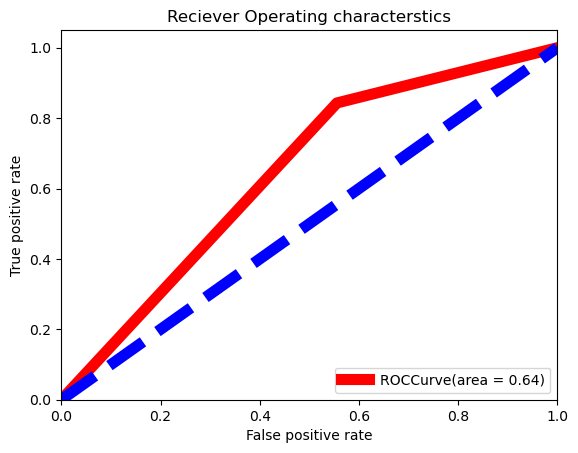

In [231]:
fpr,tpr,threshold = roc_curve(y_test,y_pre)
roc_auc = auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color= 'red',lw = 8,label='ROCCurve(area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='blue', lw= 8, linestyle = '--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Reciever Operating characterstics')
plt.legend(loc='lower right')
plt.show()

In [232]:
#in above chart Blue line is in our half of dataset and yellow line is how much our model has learn the data.
# we can see that model has very good leraning rate and accuracy

In [233]:
import pickle
filename='Glass_Identification.pkl'
pickle.dump(rf, open(filename,'wb'))

In [234]:
#Conclusion

In [235]:
loaded_model = pickle.load(open('Glass_Identification.pkl','rb'))
result = loaded_model.score(x_test,y_test)
print(result*100)

98.33333333333333


In [236]:
conclusion = pd.DataFrame([loaded_model.predict(x_test)[:],y_pred[:]], index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
Predicted,1,0,0,1,1,1,1,1,1,1,...,0,1,1,0,1,0,1,1,1,1
Original,1,0,0,1,1,1,1,1,0,0,...,0,1,1,1,1,1,0,1,0,1
